In [38]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

import include.DDPG as DDPG
from Environment import Environment

import copy, json, argparse
from include.dotdic import DotDic
from include.training import *

In [39]:
parser = argparse.ArgumentParser()
parser.add_argument("--method", default="DDPG_MC")  # Policy name
parser.add_argument("--phase", default="train")  # OpenAI gym environment name
parser.add_argument("--seed", default=0, type=int)  # Sets Gym, PyTorch and Numpy seeds
parser.add_argument("--start_timesteps", default=1e4, type=int)  # How many time steps purely random policy is run for
parser.add_argument("--eval_freq", default=1e3, type=float)  # How often (time steps) we evaluate
parser.add_argument("--max_timesteps", default=1e6, type=float)  # Max time steps to run environment for
parser.add_argument("--save_models", action="store_true")  # Whether or not models are saved
parser.add_argument("--expl_noise", default=0.0, type=float)  # Std of Gaussian exploration noise
parser.add_argument("--batch_size", default=64, type=int)  # Batch size for both actor and critic
parser.add_argument("--discount", default=0.99, type=float)  # Discount factor
parser.add_argument("--tau", default=0.005, type=float)  # Target network update rate
parser.add_argument('--actor_lr', type=float, default=1e-3)  # learning rate
parser.add_argument('--critic_lr', type=float, default=1e-3)  # learning rate
parser.add_argument('--aux_lr', type=float, default=1e-3)  # learning rate
parser.add_argument('--weight_decay', type=float, default=1e-4)  # weight decay
parser.add_argument("--policy_noise", default=0.2, type=float)  # Noise added to target policy during critic update
parser.add_argument("--noise_clip", default=0.5, type=float)  # Range to clip target policy noiseparser.add_argument("--policy_freq", default=2, type=int)  # Frequency of delayed policy updates
parser.add_argument("--gpu_id", default=0, type=int)  # The id of GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
parser.add_argument('-c1', '--config_path1', default='./configs/config_11.json', type=str, help='path to existing scenarionarios file')
parser.add_argument('-c2', '--config_path2', default='./configs/config_21.json', type=str, help='path to existing options file')
args = parser.parse_args(args=[])

file_name_DDPG = "DDPG Training"
if not os.path.exists('%s/' % (file_name_DDPG)):
  os.makedirs('%s/' % ( file_name_DDPG))

sceParam = DotDic(json.loads(open(args.config_path1, 'r').read()))
trial_scenario = copy.deepcopy(sceParam)

optParam = DotDic(json.loads(open(args.config_path2, 'r').read()))
trial_opt = copy.deepcopy(optParam)


K = trial_scenario.K_t + trial_scenario.K_r
L = trial_scenario.L_t + trial_scenario.L_r

# Actions: (Re{w_k}, Im{w_k}), (Re{u_l}, Im{u_l}), (theta_r, theta_t), rho_l
action_size =   (2 * K * trial_scenario.Nt) + \
                (2 * L * trial_scenario.Nt) + \
                (2 * trial_scenario.R * trial_scenario.Mr) + L

# States:  h, g, h_s, g_s, H, f, STR
state_size =    (trial_scenario.Nt * K) + (trial_scenario.Nt * L) + \
                (trial_scenario.Mr * trial_scenario.R * K) + \
                (trial_scenario.Mr * trial_scenario.R * L) + \
                (trial_scenario.Mr * trial_scenario.Nt * trial_scenario.R) + \
                (L * K) + 1

In [40]:
env = Environment(trial_scenario, state_size, action_size)
env_test = Environment(trial_scenario, state_size, action_size)

max_action = 1.0
agent = DDPG.DDPG(state_size, action_size, max_action, args)
training = Training(env, env_test, agent, file_name_DDPG)

In [41]:
trainEpisode = 100
maximum_steps = 200
training_epoch = 10
reward_mem, TR_mem = training.train(trainEpisode, maximum_steps, action_size, training_epoch, args)

print('DDPG_Train=', reward_mem, ';')
print('Mean_DDPG_Train=', np.mean(reward_mem), ';')

Training: 
	 episode 1/100 ...


c:\Users\Amirhosein\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Amirhosein\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


	 Objective function is  nan
Training: 
	 episode 2/100 ...
	 Objective function is  nan
Training: 
	 episode 3/100 ...
	 done in step 46
	 Objective function is  4717113.0090550855
Training: 
	 episode 4/100 ...
	 done in step 150
	 Objective function is  4790457.624434747
Training: 
	 episode 5/100 ...
	 done in step 65
	 Objective function is  4830615.739639862
Training: 
	 episode 6/100 ...
	 done in step 92
	 Objective function is  4818837.6265505925
Training: 
	 episode 7/100 ...
	 done in step 7
	 Objective function is  4851082.294676958
Training: 
	 episode 8/100 ...
	 done in step 16
	 Objective function is  4823826.854437056
Training: 
	 episode 9/100 ...
	 done in step 31
	 Objective function is  4831002.780150098
Training: 
	 episode 10/100 ...
	 Objective function is  4858359.595966426
Training: 
	 episode 11/100 ...
	 done in step 172
	 Objective function is  4860646.705202069
Training: 
	 episode 12/100 ...
	 done in step 86
	 Objective function is  4858977.290554827
Tra

In [42]:
testEpisode = 50
maximum_steps = 200
reward_mem_test, TR_mem_test = training.test(testEpisode, maximum_steps, action_size)

print('DDPG_Test=', reward_mem_test, ';')
print('DDPG_Test=', np.mean(reward_mem_test), ';')

Testing: 
	 episode 1/50 ...
	 done in step 5
	 Objective function is  6827412.403557227
Testing: 
	 episode 2/50 ...
	 done in step 85
	 Objective function is  6337091.286530826
Testing: 
	 episode 3/50 ...
	 done in step 45
	 Objective function is  6287888.919510278
Testing: 
	 episode 4/50 ...
	 done in step 10
	 Objective function is  6268295.315459503
Testing: 
	 episode 5/50 ...
	 done in step 34
	 Objective function is  6235881.478174313
Testing: 
	 episode 6/50 ...
	 done in step 12
	 Objective function is  6194016.3649768
Testing: 
	 episode 7/50 ...
	 done in step 0
	 Objective function is  6365382.189468654
Testing: 
	 episode 8/50 ...
	 done in step 17
	 Objective function is  6341495.230964193
Testing: 
	 episode 9/50 ...
	 done in step 0
	 Objective function is  6372184.071018022
Testing: 
	 episode 10/50 ...
	 done in step 0
	 Objective function is  6254883.765053907
Testing: 
	 episode 11/50 ...
	 done in step 76
	 Objective function is  6238300.588576642
Testing: 
	 ep

ValueError: operands could not be broadcast together with shapes (98,) (60,) 

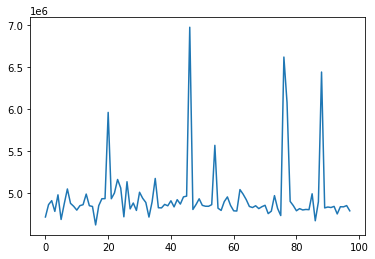

In [51]:
error = [np.std(TR_eps) for TR_eps in TR_mem]
plt.plot(range(3, trainEpisode+1), reward_mem, label='train')
plt.fill_between(range(1, trainEpisode+1), np.array(reward_mem)-error, np.array(reward_mem)+error,
    alpha=0.3)
plt.xticks(range(1, trainEpisode+1))

error_test = [np.std(TR_eps) for TR_eps in TR_mem_test]
plt.plot(range(1, testEpisode+1), reward_mem_test, label='test')
plt.fill_between(range(1, testEpisode+1), np.array(reward_mem_test)-error_test, np.array(reward_mem_test)+error_test,
    alpha=0.5)

plt.xlabel('Episodes'); plt.ylabel('TR')
plt.legend()
plt.show()